In [1]:
library(ggsankey)

library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
t1 <- sample(paste("Hosp", letters), size = 100, replace=TRUE)
t2 <- sample(x = c("Male", "Female")   , size = 100, replace=TRUE)
t3 <- floor(runif(100, min = 0, max = 110))
t4 <- sample(x = c("Survived", "Died") , size = 100, replace=TRUE)
t5  <- sample(paste("Facility ", letters), size = 100, replace=TRUE)

d <- data.frame(cbind(t1,t2,t3,t4, t5))
names(d) <- c('Hospital', 'Gender', 'AgeYears', 'Outcome', 'Dischargeto')

In [3]:
d$AgeYears <- as.integer(d$AgeYears)
d$AgeGroup <- cut(d$AgeYears, 
                  breaks = c(-Inf
                             ,5 ,10 ,15,20,25,30,35,40,45,50,55,60 ,65,70,75,80,85
                             , Inf), 
                  
                  labels = c("0-4 years"
                             ,"5-9 years","10-14 years","15-19 years","20-24 years"
                             ,"25-29 years","30-34 years","35-39 years","40-44 years"
                             ,"45-49 years","50-54 years","55-59 years","60-64 years"
                             ,"65-69 years","70-74 years","75-79 years","80-84 years"
                             ,"85+ years"),
                  right = FALSE)

In [4]:
head(d)

,Hospital,Gender,AgeYears,Outcome,Dischargeto,AgeGroup
,<chr>,<chr>,<int>,<chr>,<chr>,<fct>
1,Hosp x,Female,38,Died,Facility o,35-39 years
2,Hosp s,Female,28,Survived,Facility o,25-29 years
3,Hosp a,Female,47,Died,Facility s,45-49 years
4,Hosp x,Male,24,Died,Facility i,20-24 years
5,Hosp f,Female,55,Died,Facility t,55-59 years
6,Hosp q,Male,49,Survived,Facility w,45-49 years


In [5]:
# Step 1
df <- d %>%
  make_long(Hospital, Gender,AgeGroup, Outcome,Dischargeto)
head(df)

Warning message:
“attributes are not identical across measure variables; they will be dropped”


x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Hospital,Hosp x,Gender,Female
Gender,Female,AgeGroup,35-39 years
AgeGroup,35-39 years,Outcome,Died
Outcome,Died,Dischargeto,Facility o
Dischargeto,Facility o,NA,NA
Hospital,Hosp s,Gender,Female


In [7]:
# Step 2
dagg <- df%>%
  dplyr::group_by(node)%>%
  tally()
dagg

node,n
<chr>,<int>
0-4 years,6
10-14 years,5
15-19 years,4
20-24 years,5
25-29 years,5
30-34 years,1
35-39 years,8
40-44 years,3
45-49 years,8


In [8]:



# Step 3
df2 <- merge(df, dagg, by.x = 'node', by.y = 'node', all.x = TRUE)
df2

node,x,next_x,next_node,n
<chr>,<fct>,<fct>,<chr>,<int>
0-4 years,AgeGroup,Outcome,Survived,6
0-4 years,AgeGroup,Outcome,Died,6
0-4 years,AgeGroup,Outcome,Survived,6
0-4 years,AgeGroup,Outcome,Survived,6
0-4 years,AgeGroup,Outcome,Survived,6
0-4 years,AgeGroup,Outcome,Survived,6
10-14 years,AgeGroup,Outcome,Died,5
10-14 years,AgeGroup,Outcome,Survived,5
10-14 years,AgeGroup,Outcome,Died,5


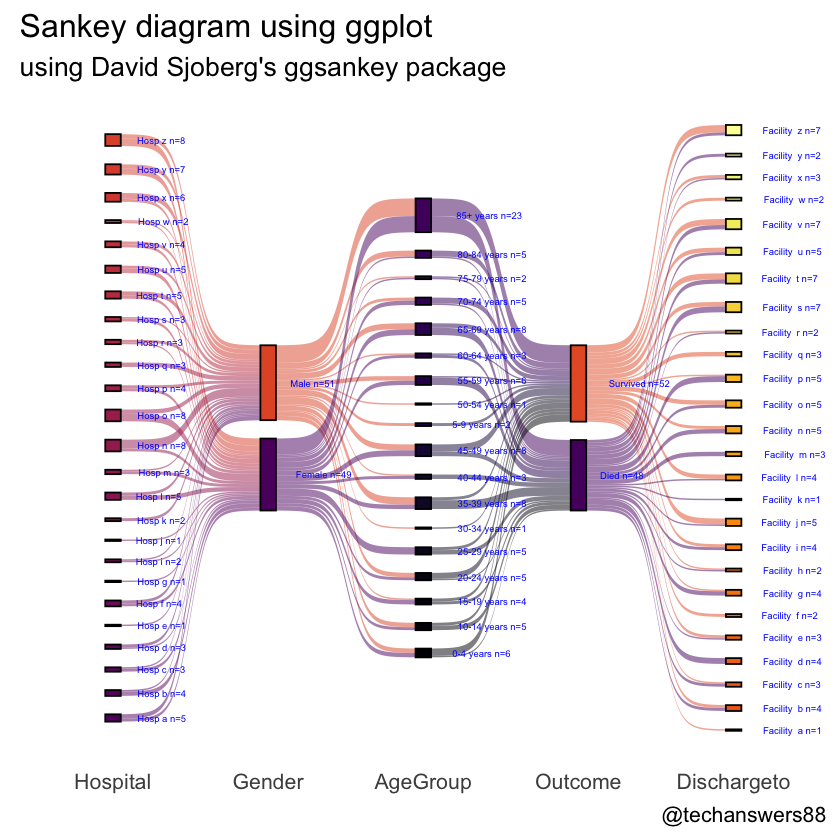

In [9]:
# Chart
pl <- ggplot(df2, aes(x = x
                      , next_x = next_x
                      , node = node
                      , next_node = next_node
                      , fill = factor(node)
                      , label = paste0(node," n=", n)
)
) 
pl <- pl +geom_sankey(flow.alpha = 0.5, node.color = "black",show.legend = TRUE)
pl <- pl +geom_sankey_text(size = 2, color = "blue", hjust = -0.5)
#pl <- pl +geom_sankey_label(size = 2, color = "black", fill= "white", hjust = -0.1)
pl <- pl +  theme_bw()
pl <- pl + theme_sankey(base_size = 16) 
pl <- pl + theme(legend.position = "none")
pl <- pl + labs(title = "Sankey diagram using ggplot")
pl <- pl + labs(subtitle = "using David Sjoberg's ggsankey package")
pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')

pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())

pl <- pl + scale_fill_viridis_d(option = "inferno")
pl

In [10]:
t1 <- sample(x = c("Hosp A", "Hosp B", "Hosp C","Hosp D") , size = 100, replace=TRUE)
t2 <- sample(x = c("Male", "Female")   , size = 100, replace=TRUE)
t3 <- sample(x = c("Survived", "Died") , size = 100, replace=TRUE)

d <- data.frame(cbind(t1,t2,t3))
names(d) <- c('Hospital', 'Gender',  'Outcome')
TotalCount = nrow(d)

In [11]:
head(d)

,Hospital,Gender,Outcome
,<chr>,<chr>,<chr>
1,Hosp C,Male,Survived
2,Hosp B,Male,Survived
3,Hosp A,Female,Survived
4,Hosp C,Female,Survived
5,Hosp D,Female,Survived
6,Hosp D,Female,Survived


In [12]:
# Step 1
df <- d %>%
  make_long(Hospital, Gender, Outcome)
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
Hospital,Hosp C,Gender,Male
Gender,Male,Outcome,Survived
Outcome,Survived,NA,NA
Hospital,Hosp B,Gender,Male
Gender,Male,Outcome,Survived
Outcome,Survived,NA,NA


In [13]:
# Step 2
dagg <- df%>%
  dplyr::group_by(node)%>%
  tally()
head(dagg)

node,n
<chr>,<int>
Died,46
Female,48
Hosp A,24
Hosp B,25
Hosp C,23
Hosp D,28


In [14]:
dagg <- dagg%>%
  dplyr::group_by(node)%>%
  dplyr::mutate(pct = n/TotalCount)
head(dagg)

node,n,pct
<chr>,<int>,<dbl>
Died,46,0.46
Female,48,0.48
Hosp A,24,0.24
Hosp B,25,0.25
Hosp C,23,0.23
Hosp D,28,0.28


In [15]:
# Step 3
df2 <- merge(df, dagg, by.x = 'node', by.y = 'node', all.x = TRUE)
head(df2)

,node,x,next_x,next_node,n,pct
,<chr>,<fct>,<fct>,<chr>,<int>,<dbl>
1,Died,Outcome,NA,NA,46,0.46
2,Died,Outcome,NA,NA,46,0.46
3,Died,Outcome,NA,NA,46,0.46
4,Died,Outcome,NA,NA,46,0.46
5,Died,Outcome,NA,NA,46,0.46
6,Died,Outcome,NA,NA,46,0.46


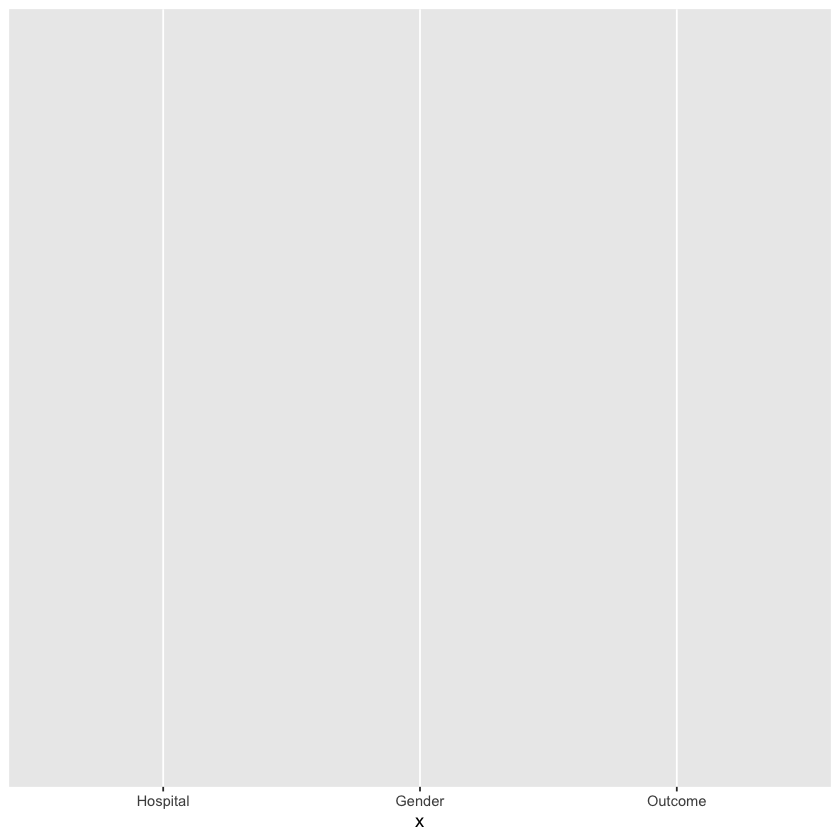

In [18]:
pl <- ggplot(df2, aes(x = x
                      , next_x = next_x
                      , node = node
                      , next_node = next_node
                      , fill = factor(node)
                      
                      , label = paste0(node," n=", n, '(',  round(pct* 100,1), '%)' ))
             )
pl

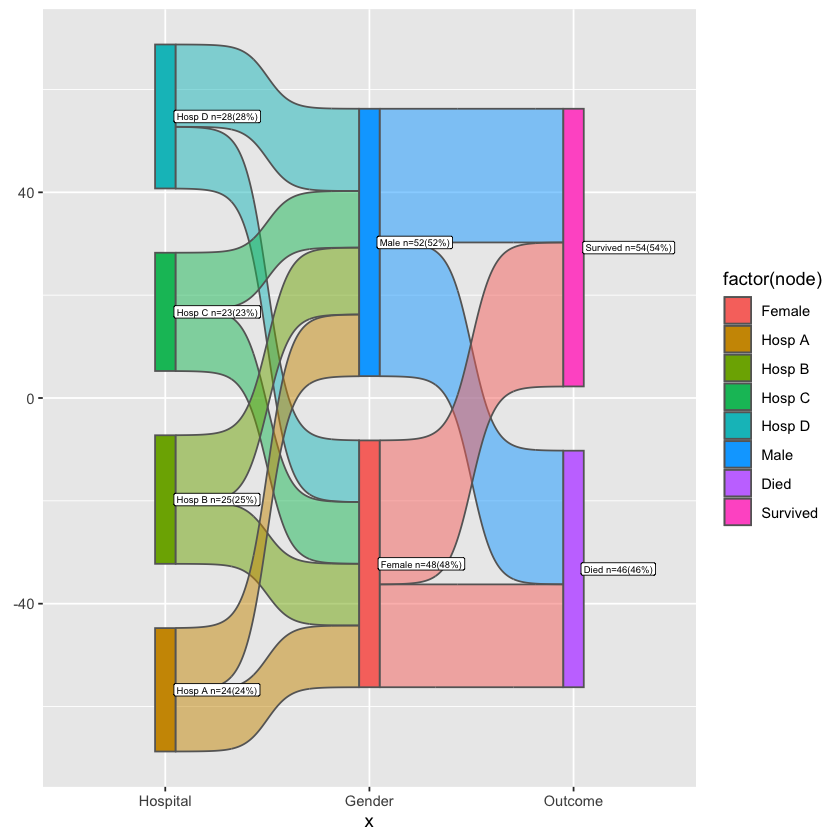

In [17]:
pl <- pl +geom_sankey(flow.alpha = 0.5,  color = "gray40", show.legend = TRUE)
  pl <- pl +geom_sankey_label(size = 2, color = "black", fill= "white", hjust = -0.1)
pl

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


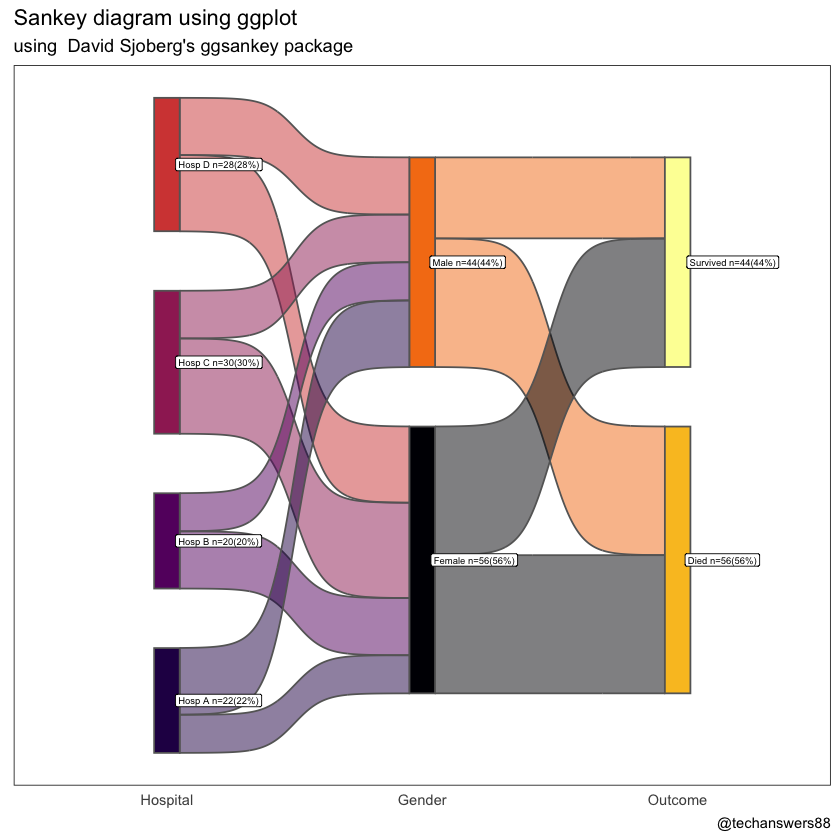

In [17]:


pl <- pl +  theme_bw()
pl <- pl + theme(legend.position = "none")
pl <- pl +  theme(axis.title = element_blank()
                  , axis.text.y = element_blank()
                  , axis.ticks = element_blank()  
                  , panel.grid = element_blank())
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl <- pl + labs(title = "Sankey diagram using ggplot")
pl <- pl + labs(subtitle = "using  David Sjoberg's ggsankey package")
pl <- pl + labs(caption = "@techanswers88")
pl <- pl + labs(fill = 'Nodes')
pl <- pl + scale_fill_viridis_d(option = "inferno")
pl

In [2]:
install.packages('networkD3')

also installing the dependency ‘data.tree’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Load package
library(networkD3)

In [4]:
# Load energy projection data
URL <- "https://cdn.rawgit.com/christophergandrud/networkD3/master/JSONdata/energy.json"
Energy <- jsonlite::fromJSON(URL)

In [5]:
# Now we have 2 data frames: a 'links' data frame with 3 columns (from, to, value), and a 'nodes' data frame that gives the name of each node.
head( Energy$links )
head( Energy$nodes )

,source,target,value
,<int>,<int>,<dbl>
1,0,1,124.729
2,1,2,0.597
3,1,3,26.862
4,1,4,280.322
5,1,5,81.144
6,6,2,35.000


,name
,<chr>
1,Agricultural 'waste'
2,Bio-conversion
3,Liquid
4,Losses
5,Solid
6,Gas


In [6]:
# Thus we can plot it
p <- sankeyNetwork(Links = Energy$links, 
                   Nodes = Energy$nodes, 
                   Source = "source",
                   Target = "target", 
                   Value = "value", 
                   NodeID = "name",
              units = "TWh", fontSize = 12, nodeWidth = 30)

source = timepoint 1
target = time point 2
node = health status 
value = colony (maybe the value could be the sample )

In [7]:
p

# save the widget
# library(htmlwidgets)
# saveWidget(p, file=paste0( getwd(), "/HtmlWidget/sankeyEnergy.html"))

HTML widgets cannot be represented in plain text (need html)

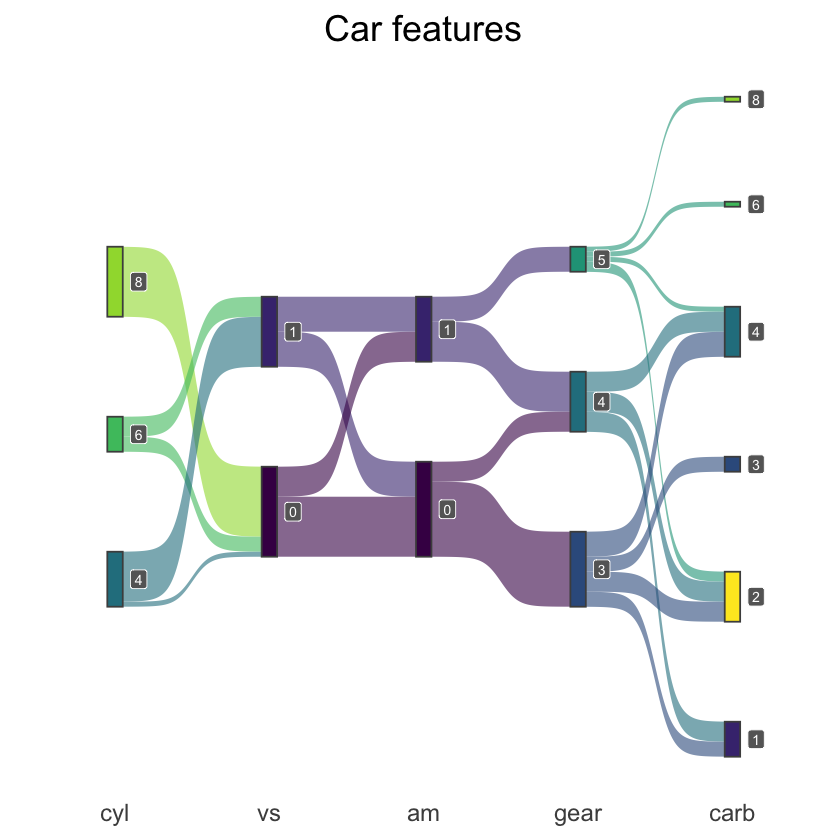

In [11]:
df <- mtcars %>%
  make_long(cyl, vs, am, gear, carb)

ggplot(df, aes(x = x, next_x = next_x, node = node, next_node = next_node, fill = factor(node), label = node)) +
  geom_sankey(flow.alpha = .6,
              node.color = "gray30",
              space = 20) +
  geom_sankey_label(size = 3, 
                    color = "white", 
                    fill = "gray40",
                    hjust = 0,
                    position = position_nudge(x = 0.1),
                    space = 20) +
  scale_fill_viridis_d() +
  theme_sankey(base_size = 18) +
  labs(x = NULL) +
  theme(legend.position = "none",
        plot.title = element_text(hjust = .5)) +
  ggtitle("Car features")

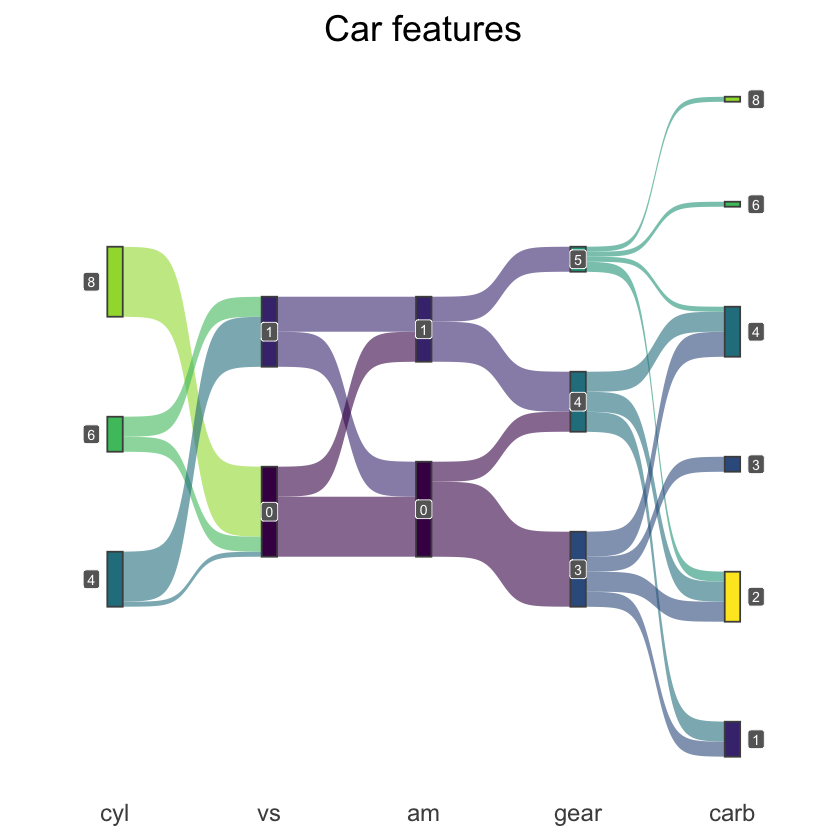

In [12]:
df <- mtcars |>
  make_long(cyl, vs, am, gear, carb)

ggplot(df, aes(
  x = x, next_x = next_x,
  node = node, next_node = next_node,
  fill = factor(node), label = node
)) +
  geom_sankey(
    flow.alpha = .6,
    node.color = "gray30",
    space = 20
  ) +
  geom_sankey_label(
    aes(
      # Shift labels conditional on position
      x = stage(x,
        after_stat = x + .1 *
          dplyr::case_when(
            x == 1 ~ -1,
            x == 5 ~ 1,
            .default = 0
          )
      ),
      # Align labels conditional on position
      hjust = dplyr::case_when(
        x == "cyl" ~ 1,
        x == "carb" ~ 0,
        .default = .5
      )
    ),
    size = 3,
    color = "white",
    fill = "gray40",
    space = 20
  ) +
  scale_fill_viridis_d() +
  theme_sankey(base_size = 18) +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = .5)
  ) +
  labs(x = NULL, title = "Car features")

In [17]:
suicidal_ideation <- sample(x = c("Suicidal Ideation") , size = 800, replace=TRUE)
sui_attempt <- sample(x = c("Yes", "No/PNS")   , size = 800, replace=TRUE)
sriu_main <- sample(x = c("0", "1") , size = 800, replace=TRUE)

data <- cbind(suicidal_ideation, sui_attempt, sriu_main) %>%
  as.data.frame()

In [20]:
head(data)

,suicidal_ideation,sui_attempt,sriu_main
,<chr>,<chr>,<chr>
1,Suicidal Ideation,Yes,1
2,Suicidal Ideation,Yes,0
3,Suicidal Ideation,No/PNS,1
4,Suicidal Ideation,No/PNS,0
5,Suicidal Ideation,No/PNS,0
6,Suicidal Ideation,No/PNS,1


In [34]:
library(ggplot2)
library(ggsankey)

data_sankey <- data %>%
  make_long(suicidal_ideation, sui_attempt, sriu_main)

In [35]:
head(data_sankey)
unique(data_sankey$x)
unique(data_sankey$node)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
suicidal_ideation,Suicidal Ideation,sui_attempt,Yes
sui_attempt,Yes,sriu_main,1
sriu_main,1,NA,NA
suicidal_ideation,Suicidal Ideation,sui_attempt,Yes
sui_attempt,Yes,sriu_main,0
sriu_main,0,NA,NA


[1] suicidal_ideation sui_attempt       sriu_main        
Levels: suicidal_ideation sui_attempt sriu_main

[1] "Suicidal Ideation" "Yes"               "1"                
[4] "0"                 "No/PNS"

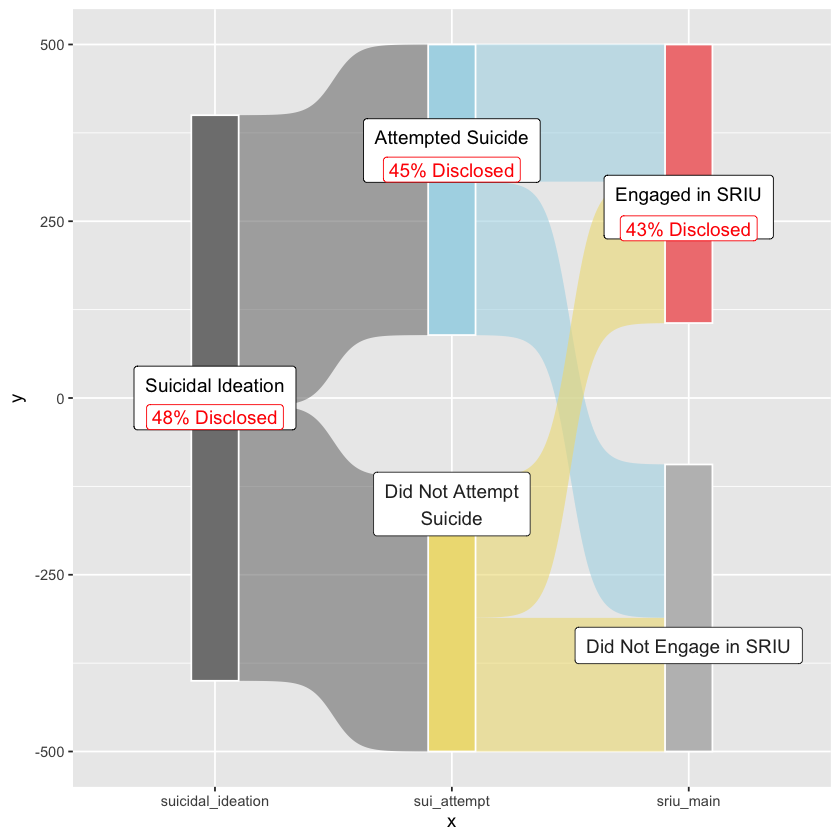

In [36]:
  ggplot(data_sankey, aes(x = x, next_x = next_x, node = node, next_node = next_node, 
                        fill = factor(node), label = node)) +
  geom_sankey(flow.alpha = 0.6, node.color = "white", width = 0.2) +
  scale_fill_manual(values = c('Suicidal ideation'="lightgreen", 'No/PNS'="lightgoldenrod", '0'="gray",
                               'Suicidal ideation'="lightgreen", 'Yes'="lightblue", '0'="lightblue",
                               'Suicidal ideation'="lightgreen", 'Yes'="lightblue", '1'="lightcoral",
                               'Suicidal ideation'="lightgreen", 'No/PNS'="lightgoldenrod", '1'="lightgreen")) + 

  annotate("label", x = 1, y = 0, label = "Suicidal Ideation\n", size = 4, color = "black", fill = "white", 
           label.padding = unit(0.5, "lines")) +

  annotate("label", x = 1, y = -27, label = "48% Disclosed", size = 4, color = "red") +
  annotate("label", x = 2, y = 350, label = "Attempted Suicide\n", size = 4, color = "black", fill = "white", 
           label.padding = unit(0.5, "lines")) +
  annotate("label", x = 2, y = 323, label = "45% Disclosed", size = 4, color = "red") +
  annotate("label", x = 2, y = -150, label = "Did Not Attempt\nSuicide", size = 4, color = "gray17", fill = "white", 
           label.padding = unit(0.5, "lines")) +
  annotate("label", x = 3, y = 270, label = "Engaged in SRIU\n", size = 4, color = "black", 
           fill = "white", label.padding = unit(0.5, "lines")) +
  annotate("label", x = 3, y = 240, label = "43% Disclosed", size = 4, color = "red") +
  annotate("label", x = 3, y = -350, label = "Did Not Engage in SRIU", size = 4, color = "gray17", 
           fill = "white", label.padding = unit(0.5, "lines")) +
  # theme_void() +
  theme(legend.position = "none") 

In [42]:
head(data_sankey)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
suicidal_ideation,Suicidal Ideation,sui_attempt,Yes
sui_attempt,Yes,sriu_main,1
sriu_main,1,NA,NA
suicidal_ideation,Suicidal Ideation,sui_attempt,Yes
sui_attempt,Yes,sriu_main,0
sriu_main,0,NA,NA


In [45]:
# annotations <- data.frame(
#   x = c(1, 1, 2, 2),
#   node = c("Suicidal ideation", "Suicidal ideation", "Attempted Suicide", "Did Not Attempt"),
#   label = c("Suicidal Ideation", "48% Disclosed", "Attempted Suicide", "Did Not Attempt")
# )


annotations <- data_sankey %>%
  filter(node %in% c("Suicidal ideation", "Yes")) %>%
  select(x, next_x, node, next_node) %>%
  distinct() %>%
  mutate(label = case_when(
    node == "Suicidal ideation" ~ "Suicidal Ideation\n48% Disclosed",
    node == "Attempted Suicide" ~ "Attempted Suicide\n45% Disclosed"
  ))
annotations

x,next_x,node,next_node,label
<fct>,<fct>,<chr>,<chr>,<chr>
sui_attempt,sriu_main,Yes,1,NA
sui_attempt,sriu_main,Yes,0,NA


In [38]:
# annotations <- annotations %>%
#   left_join(data_sankey %>% select(x, node, node_y) %>% distinct(), by = c("x", "node"))
# annotations

In [48]:
annotations <- annotations %>%
  left_join(data_sankey %>% select(x, next_x, node, next_node), 
            by = c("x", "node")) %>%
  distinct()  # remove duplicates


Warning message in left_join(., data_sankey %>% select(x, next_x, node, next_node), :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 2 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [50]:
# Add label text to original Sankey df
data_sankey <- data_sankey %>%
  group_by(x, node) %>%
  mutate(
    colony_count = n(),
    sample_count = sum(sample_condition == node, na.rm = TRUE),
    label_text = paste0(node, "\n",
                        colony_count, " colonies / ",
                        sample_count, " samples")
  ) %>%
  ungroup()

# Plot
ggplot(data_sankey, aes(x = x, next_x = next_x, node = node, next_node = next_node,
                        fill = factor(node))) +
  geom_sankey(flow.alpha = 0.6, node.color = "white", width = 0.2) +
  geom_sankey_label(aes(label = label_text)) +
  # scale_fill_manual(values = sank_colors) +
  theme(legend.position = "none")


ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `sample_count = sum(sample_condition == node, na.rm =
  TRUE)`.
[36mℹ[39m In group 1: `x = suicidal_ideation` `node = "Suicidal Ideation"`.
[1mCaused by error:[22m
[33m![39m object 'sample_condition' not found
